<h3>Cooking Up Nepali Language Model Using LSTM in 5 mins.  </h3>

<img src="images/cook.jpg" alt="Cook Image" width="350" style="display: block; margin: 0 auto;"/> 


In [1]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np
import pickle

<h3>Feeding the text Dataset as Input</h3>

In [2]:
path = 'Dataset/nep-sent-text.txt'
with open(path, 'r',encoding="utf-8") as file:
        text = file.read()

In [3]:
print(text)

बाँकी संसारले यशोधराले बुद्धलाई वासनाको वशमा पार्न लागेको आरोप लगाउँछन् ।
मेजर रणबहादुर र वसन्तमायाका माहिला छोरा गुरुङ भकुन्डोसँगको प्यार तोडेर लाहुरे जीवनशैलीमा रमाउन सकेनन् ।
 पुस्तकभित्रका कैयौं फोटासँग मेरो कसिलो साइनो पनि छ ।
 सामाजिक लोकतन्त्रको पनि ऐतिहासिक द्वन्द्ववादअन्तर्गत नै जन्म हुने हो र परिपक्व बन्ने हो ।
 खुला सीमाबाट फाइदा उठाउने भारतीयको जमात बढेको छ ।
 नभन्दै  वर्ष समय खर्चेर उनले बाटो पनि बनाए ।
 एक जना कविको शब्दमा भन्ने हो भने नेपाल एउटा जँड्याहाहरूको देश बन्न पुगेको छ ।
 त्यसैले यो लोकतन्त्रको मर्मप्रतिकूल हुन जान्छ भन्ने लेखकको आरोप अन्यथा छैन ।
 आकाशमा खेलिरहेका बादलहरूको लुकामारीमा आफ्नो जोडी तैरँदै गरेको कल्पना गर्छिन् ।
 साथीसँग वा विश्वासपात्रसँग खुलेर कुरा राख्छन् भने तिनलाई घरमा बोलाउनुहोस् ।
 शरीर र हृदयले एकैपल्ट छाम्दै गरेकी हुन्छिन् जीवनको यथार्थ ।
 आँगनमै गाडिएजस्ता पाइलाहरू बिस्तारै सर्न थालेँ ओरालो ।
 तर अब राजकुमारको मनमा चलेको आँधी रोकिने छाँट देखिँदैन ।
 साथीभाइका लागि जस्तोसुकै कठिन परिस्थितिमा पनि सहजै उपलब्ध हुन्थ्यो ।
 करिब  मिनेटमै हामी सु

In [4]:
text = text.replace('\u202f', ' ')

In [5]:

# integer encode sequences of words
tokenizer = Tokenizer() #Assign the tokenizer object to a variable
tokenizer.fit_on_texts([text]) # fit the object onto the text
encoded = tokenizer.texts_to_sequences([text])[0] # each unique word has unique integer encoding

In [6]:
with open('Pickle/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL) 

In [7]:
encoded[:10]

[318, 3490, 1981, 1982, 3491, 3492, 620, 137, 975, 1983]

<h3> Now let us check the word distribution in the text Dataset! </h3>

In [8]:
from nltk import FreqDist
fq = FreqDist(token for token in word_tokenize(text))

In [9]:
fq.most_common(15) #the top 15 unique words with their counts

[('।', 2716),
 ('पनि', 547),
 ('र', 501),
 ('छ', 299),
 ('थियो', 249),
 ('हो', 187),
 ('त', 184),
 ('यो', 158),
 ('तर', 134),
 ('भने', 127),
 ('नै', 115),
 ('भएको', 114),
 ('म', 108),
 ('हुन्छ', 108),
 ('छन्', 105)]

<h4>Extract dictionary from the 'tokenizer' object. Note that the key,value pair is the word itself and its corresponding uniquely encoded integer value.</h4>


In [10]:
word_index = tokenizer.word_index 

In [11]:
word_index

{'।': 1,
 'पनि': 2,
 'र': 3,
 'छ': 4,
 'थियो': 5,
 'त': 6,
 'हो': 7,
 'यो': 8,
 'तर': 9,
 'भने': 10,
 'नै': 11,
 'भएको': 12,
 'म': 13,
 'हुन्छ': 14,
 'एक': 15,
 'थिए': 16,
 'छन्': 17,
 'लागि': 18,
 'केही': 19,
 'गर्न': 20,
 'कुरा': 21,
 'भन्ने': 22,
 'त्यो': 23,
 'मलाई': 24,
 'आफ्नो': 25,
 'गर्ने': 26,
 'उनले': 27,
 'भयो': 28,
 'भए': 29,
 'मेरो': 30,
 'एउटा': 31,
 'धेरै': 32,
 'सबै': 33,
 'हुन': 34,
 'हामी': 35,
 'गरेको': 36,
 'मैले': 37,
 'उनी': 38,
 'के': 39,
 'हाम्रो': 40,
 'रूपमा': 41,
 'हुने': 42,
 'उनको': 43,
 'छैन': 44,
 'कारण': 45,
 'दिन': 46,
 'भनेर': 47,
 'मात्र': 48,
 'कुनै': 49,
 'त्यसैले': 50,
 'होइन': 51,
 'अनि': 52,
 'अब': 53,
 'भएर': 54,
 'काम': 55,
 'समय': 56,
 'पहिलो': 57,
 'मन': 58,
 'गर्दा': 59,
 'बेला': 60,
 'पानी': 61,
 'अर्को': 62,
 'मात्रै': 63,
 'आज': 64,
 'को': 65,
 'थाहा': 66,
 'कि': 67,
 'ठूलो': 68,
 'यस': 69,
 'भएका': 70,
 'त्यही': 71,
 'नेपाल': 72,
 'घरमा': 73,
 'दुई': 74,
 'निकै': 75,
 'आमा': 76,
 'होला': 77,
 'वा': 78,
 'त्यस': 79,
 'गरेर': 80,
 'यस्तो':

In [12]:
len(word_index)

11583

<h3>Note:</h3><span> When you tokenize text (i.e., converting text into individual words or tokens), the tokens are typically indexed based on their frequency of occurrence. This means that the most frequently occurring word in the text corpus will usually be assigned the index 1, the second most frequent word 2, and so on.<span>

In [13]:
# Create a reverse mapping from index to word
reverse_word_index = {index: word for word, index in word_index.items()}

# Map each encoded integer back to the word
decoded_text = [reverse_word_index.get(index, '') for index in encoded]

# def enco_deco(value):
#      if isinstance(value, (int, float)):
#          for key,val in reverse_word_index.items():
#              if key==value:
#                  return val
                
#      else:
#          return word_index[value]


In [14]:

# retrieve vocabulary size 
vocab_size = len(tokenizer.word_index) + 1 # this is total number of unique words from our dataset
print('Vocabulary Size: %d' % vocab_size)

sequences = list()

for i in range(4, len(encoded)):  # creating sequene of 8 words
	sequence = encoded[i-4:i+4]
	sequences.append(sequence)

Vocabulary Size: 11584


In [15]:
vocab_size 

11584

<h4> Let's see how the tokens(words) have been encoded </h4>

In [16]:
sent=[]
for i in sequences[:10]:
    words = [reverse_word_index[key] for key in i]
    sent.append(words)

for i in range(0, len(sequences[:10])):
    print(sent[i], '------------>', sequences[i], '\n')

['बाँकी', 'संसारले', 'यशोधराले', 'बुद्धलाई', 'वासनाको', 'वशमा', 'पार्न', 'लागेको'] ------------> [318, 3490, 1981, 1982, 3491, 3492, 620, 137] 

['संसारले', 'यशोधराले', 'बुद्धलाई', 'वासनाको', 'वशमा', 'पार्न', 'लागेको', 'आरोप'] ------------> [3490, 1981, 1982, 3491, 3492, 620, 137, 975] 

['यशोधराले', 'बुद्धलाई', 'वासनाको', 'वशमा', 'पार्न', 'लागेको', 'आरोप', 'लगाउँछन्'] ------------> [1981, 1982, 3491, 3492, 620, 137, 975, 1983] 

['बुद्धलाई', 'वासनाको', 'वशमा', 'पार्न', 'लागेको', 'आरोप', 'लगाउँछन्', '।'] ------------> [1982, 3491, 3492, 620, 137, 975, 1983, 1] 

['वासनाको', 'वशमा', 'पार्न', 'लागेको', 'आरोप', 'लगाउँछन्', '।', 'मेजर'] ------------> [3491, 3492, 620, 137, 975, 1983, 1, 3493] 

['वशमा', 'पार्न', 'लागेको', 'आरोप', 'लगाउँछन्', '।', 'मेजर', 'रणबहादुर'] ------------> [3492, 620, 137, 975, 1983, 1, 3493, 3494] 

['पार्न', 'लागेको', 'आरोप', 'लगाउँछन्', '।', 'मेजर', 'रणबहादुर', 'र'] ------------> [620, 137, 975, 1983, 1, 3493, 3494, 3] 

['लागेको', 'आरोप', 'लगाउँछन्', '।', 'मेजर'

<h3>Now let us check the last 5 sequences of words <h3>

In [17]:
sequences[-5:]

[[84, 493, 7, 228, 112, 11583, 3467, 4],
 [493, 7, 228, 112, 11583, 3467, 4, 1],
 [7, 228, 112, 11583, 3467, 4, 1],
 [228, 112, 11583, 3467, 4, 1],
 [112, 11583, 3467, 4, 1]]

<h4> Note: The last three sequences do not have consistent length. They can be either excluded or we can pad them to make length of words consistent</h4>

In [18]:

print('Total Sequences: %d' % len(sequences))
# pad sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)

Total Sequences: 31686
Max Sequence Length: 8


In [19]:
sequences[-5:]

array([[   84,   493,     7,   228,   112, 11583,  3467,     4],
       [  493,     7,   228,   112, 11583,  3467,     4,     1],
       [    0,     7,   228,   112, 11583,  3467,     4,     1],
       [    0,     0,   228,   112, 11583,  3467,     4,     1],
       [    0,     0,     0,   112, 11583,  3467,     4,     1]])

In [20]:
# split into input and output elements 
# for n length of a sequence, the n-1 is the length of input words(X) and the remaining 1 is output(y) ie. the last word of the sequence
sequences = array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]  


y = to_categorical(y, num_classes=vocab_size) # the output value is one hot encoded, the size of array is vocab_size * no of outputs

 <p>This is a common technique to represent categorical data numerically. Each word's integer representation in y is converted into a binary vector of length vocab_size, where all elements are zero except the index corresponding to the word's integer representation, which is set to 1.<p>

In [21]:
X[0],y[0]

(array([ 318, 3490, 1981, 1982, 3491, 3492,  620]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [22]:
print(X.shape,y.shape)

(31686, 7) (31686, 11584)


<h3> Let's define our model </h3> <h4>You can play around with the neural network parameters.</h4>

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
model = Sequential()

# Embedding layer
model.add(Embedding(vocab_size, 50, input_length=max_length-1))  


model.add(LSTM(256, return_sequences=True)) 
model.add(Dropout(0.2))  # Dropout for regularization


model.add(LSTM(256))  # Another LSTM layer
model.add(Dropout(0.2))  # Dropout for regularization

# Dense layer with more units
model.add(Dense(256, activation='relu'))  # Dense layer with 512 units and ReLU activation

# Output layer
model.add(Dense(vocab_size, activation='softmax'))  # Output layer with softmax activation

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# model.summary()

C:\Users\Dikshyant\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [24]:
#splitting train,test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Fit network
history=model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

 


Epoch 1/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 51s 107ms/step - accuracy: 0.0784 - loss: 8.6023 - val_accuracy: 0.0778 - val_loss: 8.2831
Epoch 2/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 46s 115ms/step - accuracy: 0.0752 - loss: 7.8830 - val_accuracy: 0.0778 - val_loss: 8.6087
Epoch 3/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 43s 108ms/step - accuracy: 0.0816 - loss: 7.5190 - val_accuracy: 0.0797 - val_loss: 8.9157
Epoch 4/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 44s 112ms/step - accuracy: 0.0879 - loss: 7.1793 - val_accuracy: 0.0783 - val_loss: 9.1150
Epoch 5/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.0904 - loss: 6.7146 - val_accuracy: 0.0727 - val_loss: 10.0003
Epoch 6/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.0961 - loss: 6.2232 - val_accuracy: 0.0634 - val_loss: 10.6827
Epoch 7/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.1117 - loss: 5.6429 - val_accuracy: 0.0570 - val_loss: 12.5703
Epoch 8/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.1292 - loss

KeyboardInterrupt: 

<img src="images/dark-souls.gif" alt="Cook Image" width="200" style="display: block; margin: 0 auto;" />  

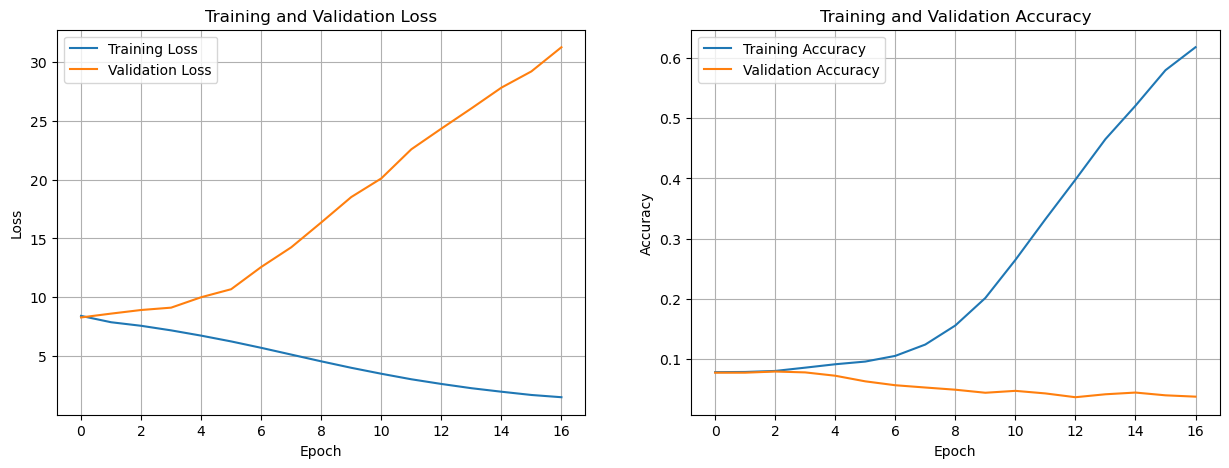

In [33]:
history=model.history

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# training and validation loss
ax1.plot(loss, label='Training Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# training and validation accuracy
ax2.plot(acc, label='Training Accuracy')
ax2.plot(val_acc, label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

# Show the plots
plt.show()


In [ ]:

model.save('../Models/nep-text-pred.keras') #save the model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('../Models/nep-text-pred.keras')

# Print the model summary to verify it was loaded correctly
model.summary()

<h3>We are loading the saved Model and the pickled tokenizer.</h3>

In [ ]:
# Load the tokenizer
import pickle
with open('Pickle/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

<h2>1 : Now, let us build a function to predict the next possible words from the input sequence<h2>

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def generate_seq(model, tokenizer, max_length, seed_text, n_words, top_n=3):
    in_text = seed_text
    generated_words = []
    generated_probabilities = []
    # Generate a fixed number of words
    for _ in range(n_words):
        # Encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # Pre-pad sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
        # Predict probabilities for each word
        yhat = model.predict(encoded, verbose=0)
        # Get top-n indices with highest probabilities
        top_indices = yhat.argsort()[0][-top_n:][::-1]
        top_probs = np.sort(yhat[0])[-top_n:][::-1]  # Extract top-n probabilities
        # Map predicted word indices to words
        top_words = []
        for idx in top_indices:
            for word, index in tokenizer.word_index.items():
                if index == idx:
                    top_words.append(word)
        # Append top words to generated words list
        generated_words.append(top_words)
        generated_probabilities.append(top_probs)
    return generated_words,generated_probabilities
    
def input_pred():
    while True:
        text = input(   "Enter your line (Enter '0' to exit): ")
        if text == "0":
            print("Execution completed....")
            break
        else:
            try:
                print(generate_seq(model, tokenizer, max_length-1,text,1))
            except Exception as e:
                print("Error occurred:", e)
                continue

In [ ]:
input_pred()  # this function gives us an input field to enter text and shows next possible words with their probabilities

<h2>2 : Now, Let us build a function to generate paragraph from the given input sequence <h2>

In [ ]:

#auto text generation
def generate_paragraph(model, tokenizer, max_length, seed_text, n_words):
    in_text = seed_text
    # Generate a fixed number of words
    for _ in range(n_words):
        # Encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # Pre-pad sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
        # Predict probabilities for each word
        yhat = model.predict(encoded, verbose=0)
        # Sample a word index from the predicted probabilities
        yhat = np.argmax(yhat)
        # Map predicted word index to word
        out_word = tokenizer.index_word.get(yhat, '')
        # Append to input
        in_text += ' ' + out_word
    return in_text


In [ ]:

print(generate_paragraph(model, tokenizer, max_length-1, 'त्यसबेला कुनै यन्त्र विज्ञान र भौतिक विज्ञानको अस्तित्व थिएन ।',80))


 <img src="images/camp-smp.gif" alt="Cook Image" width="50" style="display: block; margin: 0 auto;" />